# Import data

In [7]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader

#get train data
mnist_train = MNIST("./data",
                    train = True,download=True,
                    transform=transforms.ToTensor())

mnist_test = MNIST("./data",
                   train = False, download = True,
                   transform = transforms.ToTensor())
print("num of train data : " , len(mnist_train),"num of testdata",len(mnist_train))

#setup the DataLoader
img_size = 28
batch_size = 256
train_loader = DataLoader(mnist_train,
                          batch_size=batch_size,
                          shuffle=False)
test_loader = DataLoader(mnist_train,
                         batch_size=batch_size,
                         shuffle=False)


num of train data :  60000 num of testdata 60000


# Construct the model


Inheritance the nn.Module and construct the model

In [8]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(img_size*img_size, 1024)  # 全結合層
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = x.view(-1, img_size*img_size)  # バッチサイズ×入力の数
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
net.cuda()  # GPU対応
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


# Learning

learning the model. Take out the minibatch to train and evaluate the model by using DataLoader. Training the data by using alot of minibatch in 1 epoc. 

In [9]:
from torch import optim

#公差エントロピー誤差関数
loss_fnc = nn.CrossEntropyLoss()

#SGD
optimizer = optim.SGD(net.parameters(),lr=0.01)

#損失のログ
record_loss_train = []
record_loss_test = []

#Learning
for i in range(10):
  net.train() #train mode
  loss_train = 0
  for j,(x,t) in enumerate(train_loader): # Take out the minibatch(x,t)
    x,t = x.cuda(),t.cuda()
    y = net(x)
    loss = loss_fnc(y,t)
    loss_train += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  loss_train /=j+1
  record_loss_train.append(loss_train)

  net.eval()
  loss_test = 0
  for j, (x,t) in enumerate(test_loader):
    x,t = x.cuda(),t.cuda()
    y = net(x)
    loss = loss_fnc(y,t)
    loss_test += loss.item()
  loss_test /= j+1
  record_loss_test.append(loss_test)

  if i%1 == 0:
    print("Epoch :", i , "loss_Train:" , loss_train, "Loss_train :", loss_train)

Epoch : 0 loss_Train: 2.2274213040128665 Loss_train : 2.2274213040128665
Epoch : 1 loss_Train: 1.871822280579425 Loss_train : 1.871822280579425
Epoch : 2 loss_Train: 1.1771069653490756 Loss_train : 1.1771069653490756
Epoch : 3 loss_Train: 0.7548151462636096 Loss_train : 0.7548151462636096
Epoch : 4 loss_Train: 0.5828077285847766 Loss_train : 0.5828077285847766
Epoch : 5 loss_Train: 0.4958936078751341 Loss_train : 0.4958936078751341
Epoch : 6 loss_Train: 0.44389847459945275 Loss_train : 0.44389847459945275
Epoch : 7 loss_Train: 0.40947807653153195 Loss_train : 0.40947807653153195
Epoch : 8 loss_Train: 0.38498341228733673 Loss_train : 0.38498341228733673
Epoch : 9 loss_Train: 0.36649162696397053 Loss_train : 0.36649162696397053


# Error trends


Plot the trends of error in the graph by training data and testing data

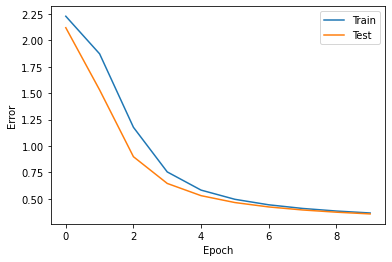

In [11]:
import matplotlib.pyplot as plt

plt.plot(range(len(record_loss_train)), record_loss_train, label="Train")
plt.plot(range(len(record_loss_test)),record_loss_test, label = "Test")
plt.legend()

plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()

# Correct rate

Calculate the correct rate using test data to understand the performance of the model

In [12]:
correct = 0
total = 0
for i, (x,t) in enumerate(test_loader):
  x,t = x.cuda(),t.cuda() # support GPU
  x = x.view(-1,img_size*img_size)
  y = net(x)
  correct += (y.argmax(1) == t).sum().item()
  total += len(x)
print("Correct rate: ", str(correct/total*100) + "%")

Correct rate:  89.91166666666666%
